  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/01**


# **Entrega 4**

---

# **COVID-19 no Brasil: Uma Abordagem Preditiva para Apoio à Gestão e Alocação de Recursos**
---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Carolina Molinari Monteforte, 10414877' #@param {type:"string"}
Aluno2 = 'Leandro da Cruz Cirqueira, 10415022' #@param {type:"string"}
Aluno3 = 'Levy Salles Bispo de Oliveira, 10415677' #@param {type:"string"}
Aluno4 = 'William Silva Veçoso, 10415710' #@param {type:"string"}


# **Resumo**

Este estudo analisa a evolução dos casos e óbitos de COVID-19 no Brasil, com foco na previsão de novos casos para apoiar a gestão de recursos de saúde pública. Utilizando dados históricos de 2020 a 2025, consolidados pelo Ministério da Saúde, foram aplicadas técnicas de modelagem de séries temporais, incluindo ARIMA, Prophet, Auto-ARIMA, XGBoost e LSTM. O objetivo é identificar padrões sazonais, prever picos de transmissão e orientar ações preventivas e alocação de recursos hospitalares.

# **Introdução**

Nas primeiras 3 semanas de 2025, o Brasil registrou mais de 57 mil casos confirmados de COVID-19, o maior número em 10 meses, representando um aumento de 151% em comparação com as últimas 3 semanas de 2024 (ESTADÃO CONTEÚDO, 2025).
Em 2025, a COVID-19 é a maior causadora de síndromes respiratórias agudas graves (SRAGs), representando 48% das notificações da doença e 87% das mortes, segundo o informe de 15/02/2025 da Secretaria de Vigilância em Saúde e Ambiente do Ministério da Saúde.

Apesar do cenário de baixa mortalidade, a circulação de novas variantes da doença pode afetar a população brasileira de maneiras bastante distintas de acordo com a sua condição socioeconômica. Um estudo conduzido na favela da Maré, no Rio de Janeiro, mostrou que linhagens do coronavírus evoluíram na comunidade e infectaram pessoas mundialmente. Fatores como piores condições sanitárias e moradias precárias colaboram para maior dispersão do vírus em comunidades, podendo catalizar novas infecções não apenas em contexto regional. Além disso, o difícil acesso ao serviço de saúde nessa região levou-a a apresentar uma taxa de mortalidade de quase o dobro do registrado na cidade do Rio de Janeiro entre 2020-2021 (AGÊNCIA BRASIL, 2025).

Nesse projeto, analisaremos séries temporais do número de casos e óbitos de COVID-19 no Brasil, desde 2020, com o objetivo de prever a quantidade de novos casos e sua sazonalidade, a fim de apoiar a tomada de decisão das autoridades e serviços de saúde na alocação de recursos hospitalares, planejamento de políticas públicas e adoção e propagação de medidas preventivas.

A previsão de novos casos e a vigilância da evolução da COVID-19 em território brasileiro é essencial para a boa gestão dos recursos de saúde pelas autoridades. A doença não se espalha homogeneamente entre as camadas socieconômicas e o surgimento de novas variantes e a baixa adesão à vacinação pode criar picos de transmissão da doença de maneira súbita, como já foi observado durante a pandemia.

A análise preditiva desses dados pode fornecer insights para os gestores planejarem ações de contenção de casos. Hospitais podem se antecipar à demanda por leitos, insumos médicos e equipes de atendimento. A identificação de crescimento regionais dão a possibilidade de criar-se estratégias de mitigação localizadas, como restrições sanitárias e campanhas. Além disso, o estudo pode revelar tendências sazonais, efeitos de medidas governamentais e o impacto de novas variantes do vírus.

Neste projeto, buscamos desenvolver um modelo preditivo que analise dados históricos de casos e de óbitos causados pela COVID-19 no território brasileiro, com o intuito de prever a quantidade de novos casos para que assim seja possível apoiar a tomada de decisão das autoridades na gestão de saúde pública.

Esperamos atingir esse objetivo através das seguintes metas:

* Coletar e processar dados oficiais de casos e óbitos relacionados à COVID-19 no Brasil;
* Aplicar e comparar técnicas de modelagem de séries temporais;
* Validar o desempenho dos modelos preditivos através de métricas de erros e testes estatísticos;
* Gerar um modelo com bom desempenho, capaz de prever a quantidade de casos ou óbitos nos próximos dias, semanas ou meses.

**Descrição da base de dados**

O conjunto de dados utilizado nesse trabalho é uma concatenação das tabelas disponíveis no painel Coronavírus Brasil, mantido pelo Ministério da Saúde. Os dados são referentes ao número de casos confirmados e óbitos no território brasileiro, no período de 25 de fevereiro de 2020 até 22 de fevereiro de 2025.

Estes dados são consolidados diariamente. Contudo, devido à complexidade do processo de atualização e às particularidades de cada município (como diferenças em porte populacional e infraestrutura), podem ocorrer revisões nos números devido a erros ou atrasos no repasse das informações.

* **Nome da tabela:** df_covid
* **Descrição:** Base de dados de casos confirmados e óbitos relacionados à COVID-19 no Brasil
* **Origem:** https://covid.saude.gov.br/
* **Tipo de arquivo:** csv
* **Sensibilidade:** Não há dados sensíveis
* **Validade:** Não há validade
* **Proprietário do dado:** Público
* **Restrições de uso:** Não há restrições de uso
* **Número de colunas:** 17
* **Número de linhas:** 10081354

Os indicadores que compõem a tabela são:

* **Casos Novos:** Quantidade de casos confirmados no dia em relação ao dia anterior, sem refletir a data de início dos sintomas.
* **Casos Acumulados:** Total de casos confirmados ao longo do período considerado.
* **Óbitos Novos:** Número de óbitos confirmados registrados no dia em comparação com o dia anterior, baseado na data de confirmação.
* **Óbitos Acumulados:** Total de óbitos confirmados no período.
* **Estimativa de Casos Recuperados e em Acompanhamento:** Indicadores que estimam, segundo critérios da OMS e cálculos compostos, o número de pacientes recuperados e aqueles que permanecem em acompanhamento (notificados nos últimos 14 dias sem desfecho).

**Tabela de Metadados:**

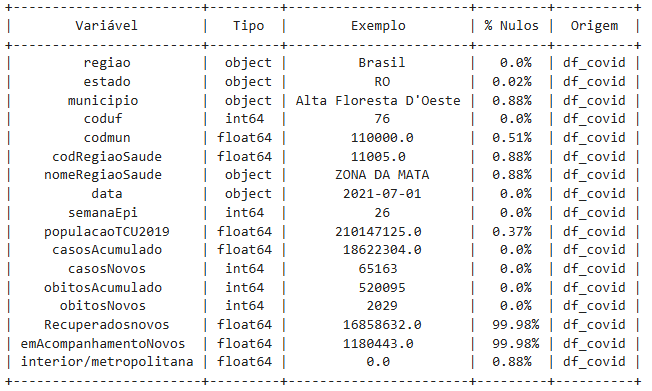

**Descrição dos campos:**

* regiao: Região geográfica do Brasil (Norte, Sul, Sudeste, etc.).
* estado: Estado brasileiro onde o município está localizado.
* municipio: Nome do município.
* coduf: Código da unidade federativa (estado) de acordo com o IBGE.
* codmun: Código do município.
* codRegiaoSaude: Código da região de saúde onde o município está localizado.
* nomeRegiaoSaude: Nome da região de saúde onde o município está localizado.
* data: Data de registro do boletim epidemiológico.
* semanaEpi: Semana epidemiológica (intervalo de 7 dias).
* populacaoTCU2019: População total do Brasil em 2019, conforme TCU.
* casosAcumulado: Total de casos registrados até a data.
* casosNovos: Casos novos registrados no período.
* obitosAcumulado: Total de óbitos acumulados até a data.
* obitosNovos: Óbitos novos registrados no período.
* Recuperadosnovos: Pessoas recuperadas no período.
* emAcompanhamentoNovos: Pessoas em acompanhamento no período.
* interior/metropolitana: Classificação de localização (0 = Interior, 1 = Metropolitana).


# **Referencial Teórico**

A análise de séries temporais é uma técnica estatística usada para prever valores futuros com base em dados históricos. Podemos usá-la em situações de previsão de eventos, como a evolução de casos de COVID-19. Os principais algoritmos para predição de séries temporais incluem modelos autorregressivos (AR), modelos de médias móveis (MA), ARIMA (AutoRegressive Integrated Moving Average), redes neurais recorrentes (RNN), e modelos híbridos como LSTM (Long Short-Term Memory) e GRU (Gated Recurrent Units). Cada um desses algoritmos tem suas próprias vantagens e limitações de precisão, complexidade computacional, e capacidade de lidar com diferentes tipos de dados.

No estudo "Prediction of COVID-19 using Time-Sliding Window: The case of Piauí State - Brazil", os pesquisadores utilizaram a regressão linear Ridge associada a uma abordagem de janela temporal deslizante para prever casos e óbitos de COVID-19. Com um Explained Variance Score (EVS) de até 0,998 para casos e 0,999 para óbitos, a metodologia demonstrou alta precisão preditiva. Essa abordagem permitiu ajustes mais eficazes nas políticas públicas em curto prazo, destacando-se por sua capacidade de fornecer informações detalhadas sobre a progressão da infecção em comparação com métodos cumulativos.

Já no artigo "Forecasting COVID-19 Cases, Hospital Admissions, and Deaths Based on Wastewater SARS-CoV-2 Surveillance Using Gaussian Copula Time Series Marginal Regression Model", os pesquisadores utilizaram a carga viral do SARS-CoV-2 em águas residuais como indicador para prever casos, hospitalizações e óbitos. A combinação de um modelo ARMA com a função de cópula Gaussiana resultou em previsões alinhadas aos dados reportados em 90% das observações dentro do intervalo de confiança de 99%. Apesar dos resultados promissores, o modelo mostrou limitações na previsão de hospitalizações e óbitos.

O trabalho "Forecasting COVID-19 Pandemic Using Prophet, ARIMA, and Hybrid Stacked LSTM-GRU Models in India" testou modelos Prophet, ARIMA, e uma versão híbrida de LSTM e GRU para prever casos confirmados e ativos na Índia. O modelo híbrido LSTM-GRU apresentou maior precisão preditiva, evidenciado pelos melhores valores de R² e RMSE. No entanto, sua eficácia depende de um grande volume de dados para treinamento e demanda maior capacidade computacional.

Por fim, o artigo "Time series analysis and forecasting of coronavirus disease in Indonesia using ARIMA model and PROPHET" avaliou os modelos ARIMA e Prophet para prever a evolução da COVID-19 na Indonésia. O Prophet superou o ARIMA em precisão preditiva, embora tenha mostrado limitações em previsões de longo prazo, evidenciando dificuldades na modelagem de tendências estendidas.

Os modelos de séries temporais oferecem várias alternativas para a predição de casos de COVID-19, cada um com suas vantagens e limitações. Modelos simples como ARIMA são eficazes para séries temporais curtas e bem comportadas, enquanto modelos mais complexos como LSTM e GRU são melhores para séries longas e com padrões não lineares, embora exijam mais dados e poder computacional. A escolha do modelo ideal depende das características específicas dos dados e dos objetivos do estudo.

# **Diagrama de solução**

Este pipeline de solução está estruturado em quatro etapas principais: Coleta de Dados, Processamento de Dados, Análise Exploratória e Visualização, e Modelagem. A seguir, apresento a descrição detalhada de cada etapa:<br>

#### **1 - Coleta de dados**
Os dados utilizados para a análise foram obtidos a partir do portal oficial de dados do Ministério da Saúde, disponível em https://covid.saude.gov.br/. Os dados estão no formato .csv, contendo informações sobre casos e óbitos de COVID-19 no Brasil.

#### **2 - Processamento de dados**
Os dados foram importados e armazenados em um DataFrame, com foco em colunas relevantes para a previsão de novos casos de COVID-19. Colunas como "Recuperados Novos" e "Em Acompanhamento Novos" foram descartadas devido à alta quantidade de valores nulos e à falta de relevância para o objetivo da análise.

As tarefas de pré-processamento incluíram:

* Conversão da coluna de data para o formato datetime, tratando erros.

* Remoção de linhas com datas inválidas.

* Ordenação dos dados por data.

* Agregação dos dados por trimestre para melhor visualização.

* Cálculo da taxa de letalidade por trimestre, considerando o número acumulado de casos e óbitos.

* Cálculo da variação percentual de casos e óbitos entre trimestres.

#### **3 - Análise exploratória de dados**
A análise exploratória foi realizada para compreender o comportamento dos dados, destacando pontos como a variação significativa no número de casos acumulados (até 39 milhões) e óbitos acumulados (até 715 mil). Casos novos apresentaram média baixa, mas grande dispersão, enquanto a população média de 113.907 revelou grandes diferenças entre municípios. Além disso, o número de recuperados novos variou amplamente devido à alta proporção de valores nulos.

Os achados e processos da EDA e do pré-processamento serão discutidos em detalhes na próxima sessão deste documento.

#### **4 - Modelagem**

A natureza não estacionária e não linear da série temporal indica que modelos convencionais, como ARIMA, podem não ser suficientes. Portanto, foram considerados os seguintes modelos para previsão:

* ARIMA: Para captura de padrões temporais lineares.

* Prophet: Para lidar com séries temporais com sazonalidade e tendências não lineares.

* Redes Neurais Recorrentes (RNN): Para capturar padrões mais complexos e não lineares.

A avaliação dos modelos será feita com as seguintes métricas de erro:

* MAE: Erro médio absoluto

* MSE: Erro quadrático médio

* MAPE: Erro percentual médio

# **EDA e Pré-processamento dos dados**

#### **Processamento de dados**
Como discutido anteriormente, os dados foram importados e armazenados em um DataFrame. As colunas relacionadas a "Recuperados Novos" e "Em Acompanhamento Novos" foram descartadas, pois possuem valores nulos em grande quantidade e não são essenciais para o objetivo da análise. A tabela de análise de valores nulos foi gerada para monitorar as variáveis e sua integridade.

**Tabela de análise de nulos**

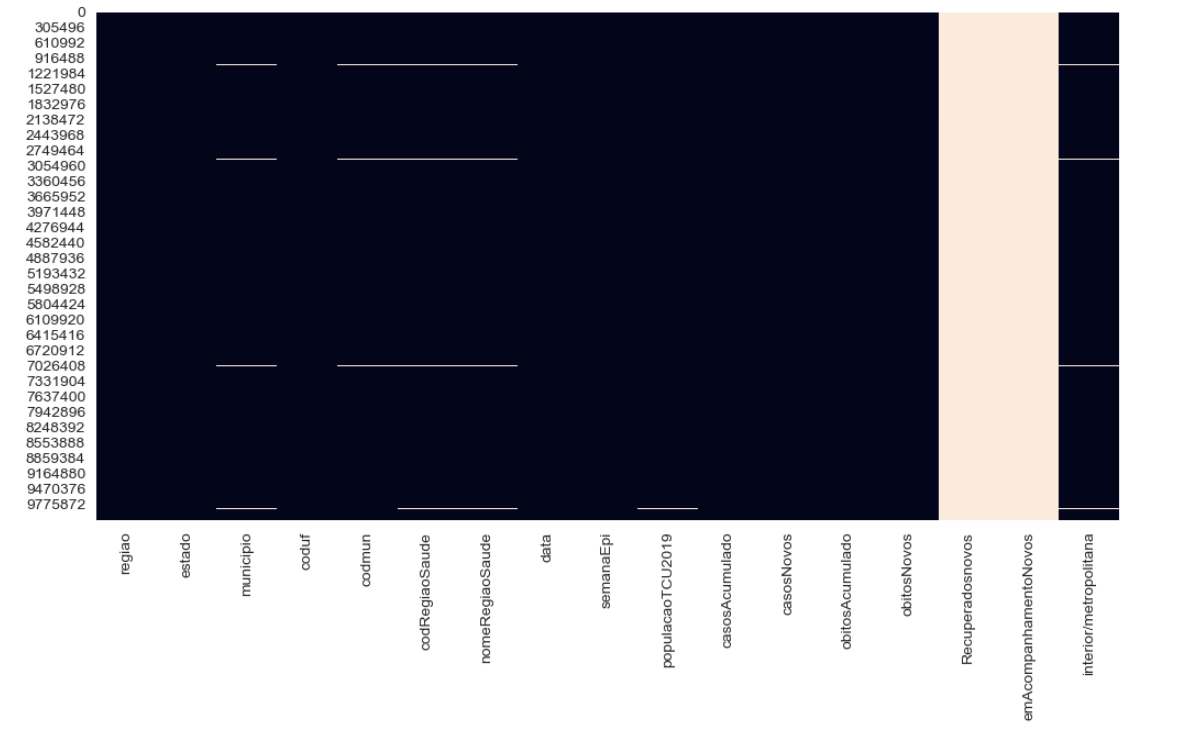

#### **Análise Explorátoria dos dados e Visualização**

A análise exploratória foi realizada para entender melhor o comportamento dos dados. Os pontos chave observados no resumo estátistico foram:

* Casos e Óbitos: O número de casos acumulados e óbitos acumulados possui uma grande variação, com valores de até 39 milhões e 715 mil, respectivamente. Os casos novos têm uma média baixa, mas com grande variação, e os óbitos novos também apresentam valores com grande dispersão.<br>

* População: A população varia bastante, com a média em 113.907, mas com um desvio padrão alto, indicando grandes diferenças entre municípios.<br>

* Recuperados e Acompanhamento: O número de recuperados novos é alto, mas também varia muito, com valores de até 38 milhões por conta dos proporção de nulos.<br>

Alguns gráficos foram criadas para analisar o comportamento dos dados, sendo:

**Evolução dos casos novos por COVID-19 no Brasil**
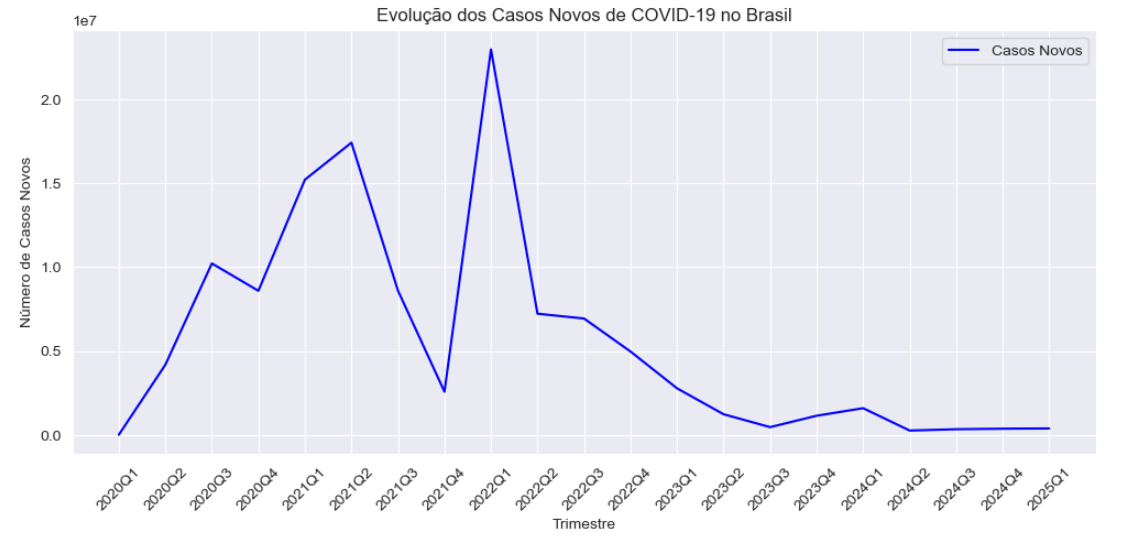

* Crescimento inicial (2020): O número de casos aumentou rapidamente, com ondas sucessivas impulsionadas pela disseminação inicial do vírus e dificuldades no controle.

* Picos graves (2021-2022): O Brasil enfrentou altas significativas, especialmente no início de 2021 (associado à variante Gama) e no início de 2022 (provável efeito da variante Ômicron).

* Queda progressiva (2022 em diante): A partir do pico de 2022, os casos começaram a diminuir, refletindo o avanço da vacinação e maior imunidade da população.

* Estabilização em baixos níveis (2023-2024): Os registros de novos casos se mantêm reduzidos, indicando menor impacto do vírus, embora ainda ocorram oscilações.


**Evolução dos óbitos novos por COVID-19 no Brasil**
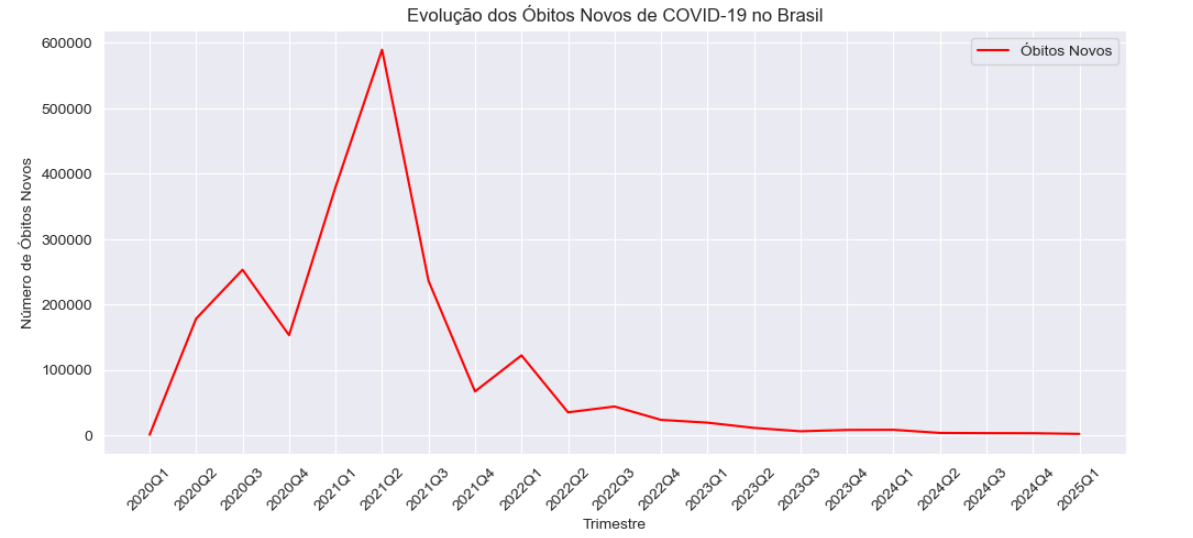

* Aumento inicial (2020): Os óbitos cresceram rapidamente, acompanhando o avanço da pandemia e o colapso do sistema de saúde.

* Pico máximo (2021Q2): O maior número de mortes ocorreu no primeiro semestre de 2021, impulsionado pela variante Gama e pela sobrecarga hospitalar.

* Queda progressiva (2022 em diante): A partir de 2022, os óbitos começaram a diminuir, refletindo o impacto da vacinação e melhores tratamentos.

* Estabilização em baixos níveis (2023-2024): Assim como os casos, as mortes seguem em patamares reduzidos, sugerindo um controle mais efetivo da doença.


**Evolução da taxa de letalidade**
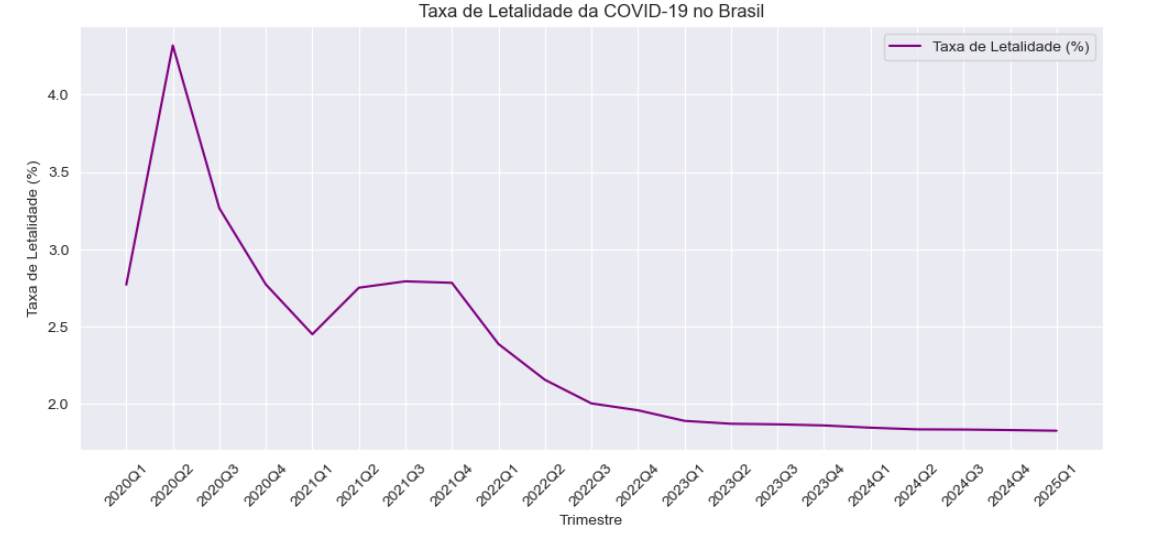

* Alta inicial (2020): No início, a taxa de letalidade ultrapassou 4%, devido à falta de tratamentos eficazes e infraestrutura hospitalar sobrecarregada.

* Queda gradual (2021-2022): Apesar do aumento de casos e óbitos, a taxa de letalidade diminuiu com a ampliação do atendimento e vacinação.

* Estabilização em níveis baixos (2023 em diante): Desde 2023, a taxa se mantém próxima de 2%, refletindo um cenário de menor gravidade da doença.

**Relação entre casos e óbitos**

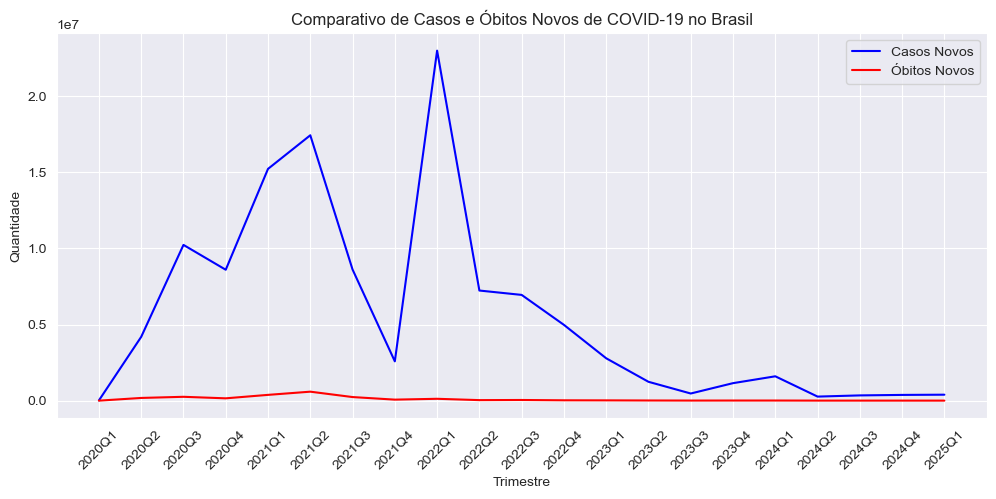

* Apesar do aumento expressivo dos casos durante o pico do primeiro trimestre de  2022, os óbitos não acompanharam na mesma proporção, o que pode ser atribuído à vacinação em massa e à menor letalidade da variante Ômicron.

* Tanto os casos novos quanto os óbitos seguem uma tendência de queda ao longo do tempo, com os óbitos apresentando uma estabilização mais consistente e menos variação do que os casos.


Com base nos pontos acima abordados, a série temporal da COVID-19 no Brasil pode ser classificada da seguinte forma:

* Não Sazonal: Embora existam picos bem definidos (como o de 2021), esses aumentos não ocorrem de maneira estritamente periódica. A pandemia é um evento dinâmico, influenciado por variantes do vírus, políticas de contenção e vacinação.

* Não Linear: A evolução dos óbitos e da taxa de letalidade não segue uma tendência linear. Há períodos de crescimento exponencial e quedas abruptas, indicando um comportamento não linear.

* Não Estacionária: A média e a variância dos dados variam significativamente ao longo do tempo. O número de óbitos apresenta grandes oscilações, o que caracteriza uma série não estacionária.

* Univariada e Multivariada (dependendo do contexto): Se analisarmos apenas o número de óbitos, a série é univariada. No entanto, ao considerar também variáveis como taxa de letalidade, número de casos e hospitalizações, o contexto se torna multivariado.

* Não Caótica: Apesar da variação nos dados, há um padrão explicável pelas ondas da pandemia, intervenções governamentais e avanços na vacinação. Isso diferencia a série de um comportamento puramente aleatório.


In [ ]:
# Códigos aqui

## 1. Definição dos pacotes

In [ ]:
#Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import prophet
import statsmodels.api as sm


%matplotlib inline
sns.set_style('darkgrid')

## 2. Geração da tabela de Metadados



In [ ]:
df = pd.read_csv("df_covid.csv")
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-01,26,210147125.0,18622304.0,65163,520095,2029,16858632.0,1180443.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-02,26,210147125.0,18687469.0,65165,521952,1857,16931272.0,1170937.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-03,26,210147125.0,18742025.0,54556,523587,1635,16989351.0,1176166.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-04,27,210147125.0,18769808.0,27783,524417,830,17033808.0,1184630.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-07-05,27,210147125.0,18792511.0,22703,525112,695,17082876.0,1162515.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081354 entries, 0 to 10081353
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(7), int64(5), object(5)
memory usage: 1.3+ GB


### 5.1 Tabela com os metadados

In [ ]:
# extrair nome das colunas
nomes_colunas = df.columns.tolist()

# extrair tipos de dados
tipos_dados = df.dtypes.tolist()

# extrair número de valores nulos
num_nulos = df.isnull().sum().tolist()

# criar lista com exemplos de valores não nulos e origem dos dados
exemplos = []
for coluna in nomes_colunas:
    exemplo = df[coluna].dropna().iloc[0]  # pega o primeiro valor não nulo
    exemplos.append(exemplo)

# origem dos dados
origem = ['df_covid'] * len(nomes_colunas)

# criar a tabela PrettyTable
table = PrettyTable()

# Definir os nomes das colunas
table.field_names = ["Variável", "Tipo", "Exemplo", "% Nulos", "Origem"]

# Adicionar as linhas na tabela
for i in range(len(nomes_colunas)):
    table.add_row([nomes_colunas[i], tipos_dados[i], exemplos[i],
                  f"{round((num_nulos[i] / df.shape[0]) * 100, 2)}%", origem[i]])

# Exibir
print(table)

+------------------------+---------+-----------------------+---------+----------+
|        Variável        |   Tipo  |        Exemplo        | % Nulos |  Origem  |
+------------------------+---------+-----------------------+---------+----------+
|         regiao         |  object |         Brasil        |   0.0%  | df_covid |
|         estado         |  object |           RO          |  0.02%  | df_covid |
|       municipio        |  object | Alta Floresta D'Oeste |  0.88%  | df_covid |
|         coduf          |  int64  |           76          |   0.0%  | df_covid |
|         codmun         | float64 |        110000.0       |  0.51%  | df_covid |
|     codRegiaoSaude     | float64 |        11005.0        |  0.88%  | df_covid |
|    nomeRegiaoSaude     |  object |      ZONA DA MATA     |  0.88%  | df_covid |
|          data          |  object |       2021-07-01      |   0.0%  | df_covid |
|       semanaEpi        |  int64  |           26          |   0.0%  | df_covid |
|    populacaoTC

In [ ]:
# Resumo estatístico
describe_stats = df.describe()
print("\nResumo Estatístico:")
print(describe_stats)



Resumo Estatístico:
              coduf        codmun  codRegiaoSaude     semanaEpi  \
count  1.008135e+07  1.003025e+07    9.992580e+06  1.008135e+07   
mean   3.236025e+01  3.252580e+05    3.240312e+04  2.688938e+01   
std    9.873899e+00  9.853503e+04    9.836342e+03  1.505262e+01   
min    1.100000e+01  1.100000e+05    1.100100e+04  1.000000e+00   
25%    2.500000e+01  2.512000e+05    2.501000e+04  1.400000e+01   
50%    3.100000e+01  3.146100e+05    3.105900e+04  2.700000e+01   
75%    4.100000e+01  4.119150e+05    4.101500e+04  4.000000e+01   
max    7.600000e+01  5.300100e+05    5.300100e+04  5.300000e+01   

       populacaoTCU2019  casosAcumulado    casosNovos  obitosAcumulado  \
count      1.004368e+07    1.008135e+07  1.008135e+07     1.008135e+07   
mean       1.139066e+05    1.448174e+04  1.166631e+01     2.963992e+02   
std        2.960280e+06    4.188451e+05  2.288801e+03     8.451936e+03   
min        7.810000e+02    0.000000e+00 -1.412689e+06     0.000000e+00   
25%  

## 3. Tratamento de nulos

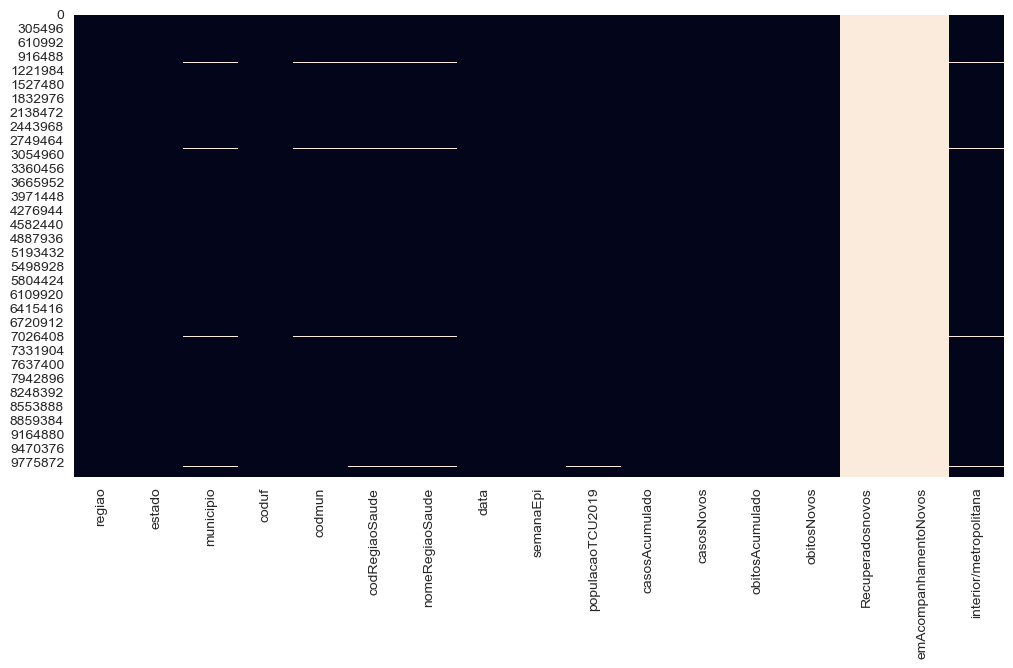

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# remover colunas irrelevantes pra análise
df.drop(columns=["Recuperadosnovos", "emAcompanhamentoNovos"], inplace=True)

## 4 Análise Explorátoria

### 4.1 Preparação dos dados

In [ ]:
# Converter a coluna de data para formato datetime, tratando erros
df["data"] = pd.to_datetime(df["data"], errors='coerce')

# Remover linhas com datas inválidas
df = df.dropna(subset=["data"])

# Ordenar os dados por data
df = df.sort_values(by="data")

# Agregar os dados por trimestre para melhor visualização
df["trimestre"] = df["data"].dt.to_period("Q")
df_trimestral = df.groupby("trimestre")[["casosNovos", "obitosNovos", "casosAcumulado", "obitosAcumulado"]].sum().reset_index()
df_trimestral["trimestre"] = df_trimestral["trimestre"].astype(str)

# Calcular taxa de letalidade por trimestre
df_trimestral["taxa_letalidade"] = (df_trimestral["obitosAcumulado"] / df_trimestral["casosAcumulado"]) * 100

# Calcular variação percentual de casos e óbitos entre trimestres
df_trimestral["variacao_casos"] = df_trimestral["casosNovos"].pct_change() * 100
df_trimestral["variacao_obitos"] = df_trimestral["obitosNovos"].pct_change() * 100

### 4.2 Visualização de dados

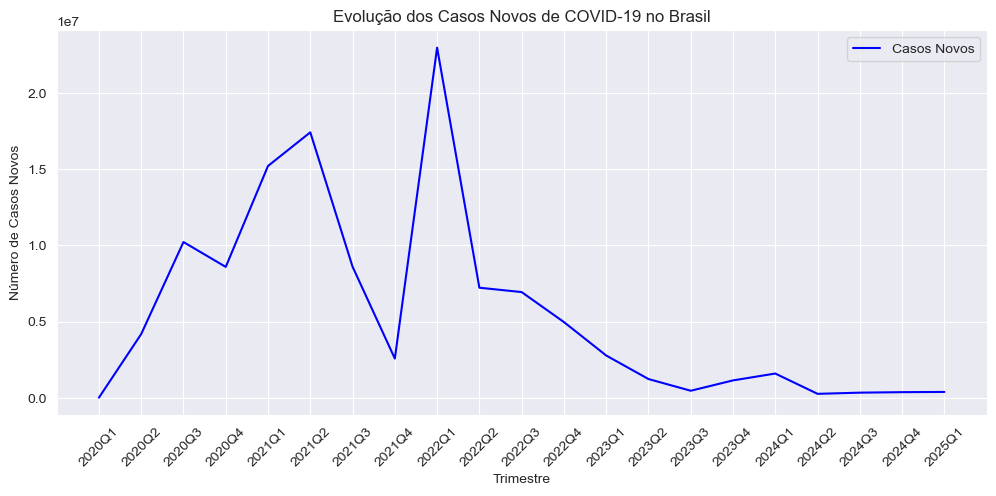

In [ ]:
# Plotar evolução dos casos novos por trimestre
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos", color="blue")
plt.xlabel("Trimestre")
plt.ylabel("Número de Casos Novos")
plt.title("Evolução dos Casos Novos de COVID-19 no Brasil")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

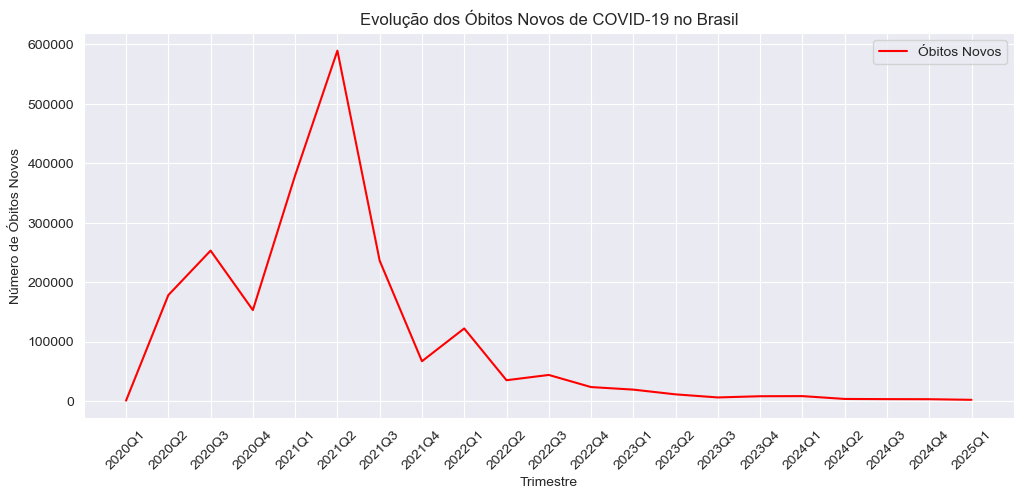

In [ ]:
# Plotar evolução dos óbitos novos por trimestre
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["obitosNovos"], label="Óbitos Novos", color="red")
plt.xlabel("Trimestre")
plt.ylabel("Número de Óbitos Novos")
plt.title("Evolução dos Óbitos Novos de COVID-19 no Brasil")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

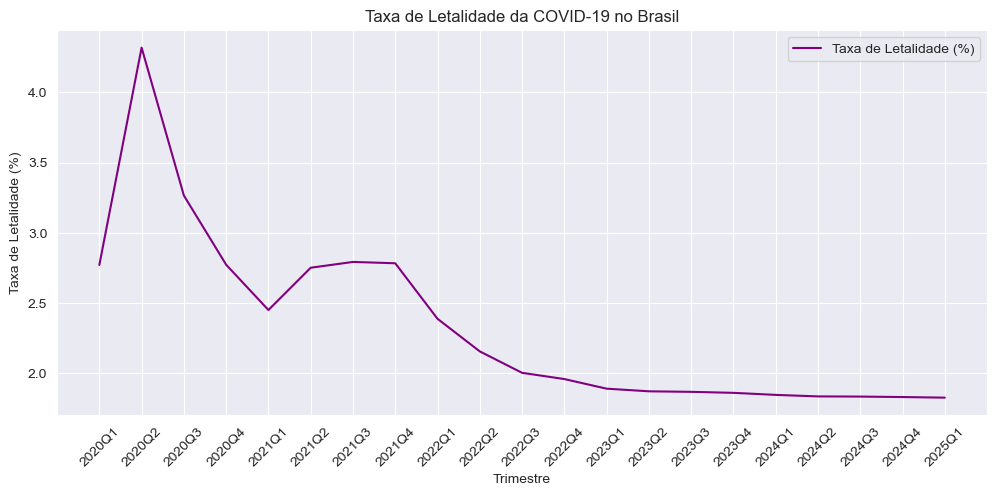

In [ ]:
# Plotar taxa de letalidade
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["taxa_letalidade"], label="Taxa de Letalidade (%)", color="purple")
plt.xlabel("Trimestre")
plt.ylabel("Taxa de Letalidade (%)")
plt.title("Taxa de Letalidade da COVID-19 no Brasil")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

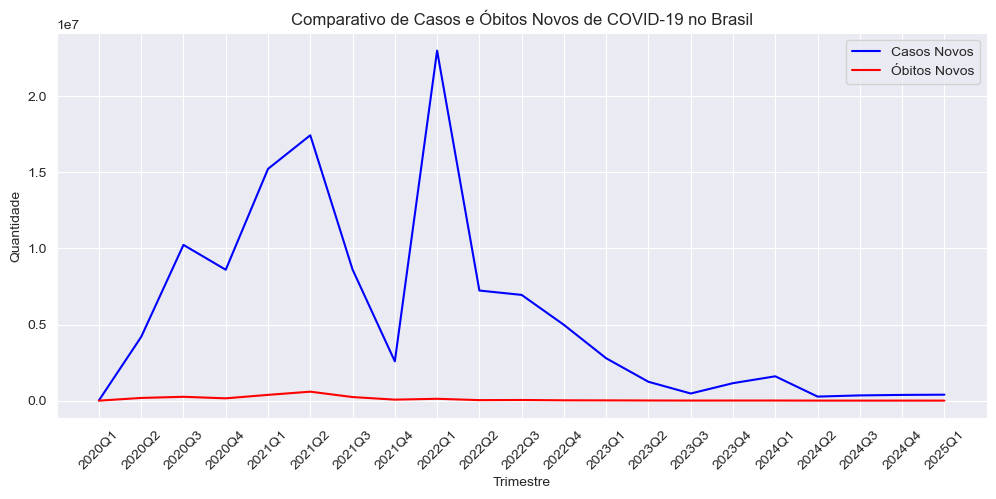

In [ ]:
0# Comparar casos novos e óbitos novos no mesmo gráfico
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos", color="blue")
plt.plot(df_trimestral["trimestre"], df_trimestral["obitosNovos"], label="Óbitos Novos", color="red")
plt.xlabel("Trimestre")
plt.ylabel("Quantidade")
plt.title("Comparativo de Casos e Óbitos Novos de COVID-19 no Brasil")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Modelos**

A série temporal foi dividida em conjuntos de treino e teste de forma cronológica. Aproximadamente 80% dos dados foram alocados para o conjunto de treino, utilizado para ajustar os parâmetros dos modelos. Os 20% restantes constituíram o conjunto de teste, empregado para avaliar o desempenho preditivo dos modelos em dados não observados durante o treinamento.

Foram implementados e avaliados diferentes modelos de séries temporais para a previsão de casos novos:

*   **ARIMA (AutoRegressive Integrated Moving Average):** Um modelo univariado clássico para séries temporais, ajustado com parâmetros (p, d, q) pré-definidos.
*   **Auto-ARIMA e Auto-SARIMA (Seasonal AutoRegressive Integrated Moving Average):** Utilizando a função `auto_arima`, os melhores parâmetros para modelos ARIMA (e SARIMA, considerando sazonalidade trimestral com período m=4) foram determinados automaticamente com base no critério de informação de Akaike (AIC).
*   **Prophet:** Uma biblioteca desenvolvida pelo Facebook, projetada para modelar séries temporais com forte influência de efeitos sazonais e feriados.
*   **XGBoost (Extreme Gradient Boosting):** Um algoritmo de machine learning baseado em árvores de decisão, aplicado aqui como um regressor para a série temporal. A otimização dos hiperparâmetros do XGBoost foi realizada através de uma busca em grade (`GridSearchCV`) combinada com validação cruzada temporal (`TimeSeriesSplit`), visando minimizar o Erro Absoluto Médio (MAE).
*   **NeuralProphet:** Uma extensão do Prophet, que incorpora componentes de redes neurais para a modelagem de séries temporais.

O desempenho de cada modelo foi avaliado no conjunto de teste utilizando métricas de erro comuns em problemas de regressão e previsão de séries temporais:

*   **Erro Absoluto Médio (MAE):** Calculado como $\frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$, onde $y_i$ é o valor real e $\hat{y}_i$ é o valor previsto.
*   **Erro Quadrático Médio (MSE):** Calculado como $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$.
*   **Raiz do Erro Quadrático Médio (RMSE):** Calculado como $\sqrt{MSE}$.
*   **Erro Percentual Absoluto Médio (MAPE):** Calculado como $\frac{1}{n} \sum_{i=1}^{n} |\frac{y_i - \hat{y}_i}{y_i}| \times 100\%$.

Além das métricas quantitativas, a visualização das previsões em comparação com os dados reais no conjunto de teste foi utilizada para uma análise qualitativa do ajuste do modelo.

### Modelo de previsão ARIMA

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 8568625.03
MSE: 91566632632763.84
RMSE: 9569045.54
MAPE: 1458.49%


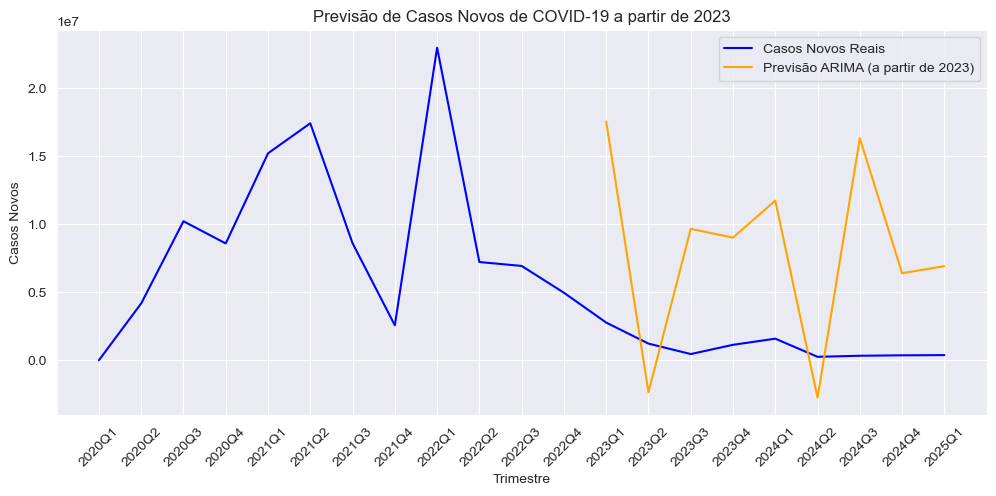

In [ ]:
# Converter trimestre para datetime correspondente ao início do trimestre
df_trimestral["trimestre_dt"] = pd.PeriodIndex(df_trimestral["trimestre"], freq="Q").to_timestamp()

# Separar dados: treino antes de 2023, teste a partir de 2023
train = df_trimestral[df_trimestral["trimestre_dt"] < "2023-01-01"]["casosNovos"]
test = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["casosNovos"]
test_index = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["trimestre"]

# Treinar o modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=len(test))

# Avaliação
mae = mean_absolute_error(test, forecast_arima)
mse = mean_squared_error(test, forecast_arima)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_arima) / test)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plotar previsões
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos Reais", color="blue")
plt.plot(test_index, forecast_arima, label="Previsão ARIMA (a partir de 2023)", color="orange")
plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 a partir de 2023")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### Modelo de previsão Prophet

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
11:52:11 - cmdstanpy - INFO - Chain [1] start processing
11:52:11 - cmdstanpy - INFO - Chain [1] done processing



Avaliação do modelo ARIMA:
MAE: 8568625.03
MSE: 91566632632763.84
RMSE: 9569045.54
MAPE: 1458.49%

Avaliação do modelo Prophet:
MAE: 2211230.40
MSE: 8872718319286.55
RMSE: 2978710.85
MAPE: 387.86%


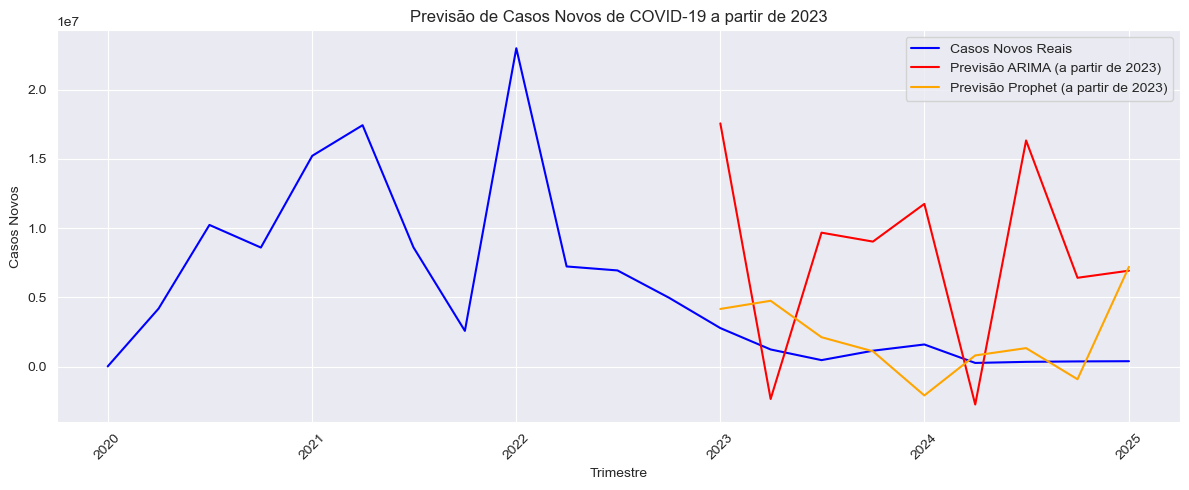

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

#  Converter trimestre para datetime correspondente ao início do trimestre
df_trimestral["trimestre_dt"] = pd.PeriodIndex(df_trimestral["trimestre"], freq="Q").to_timestamp()

#  Separar treino e teste
train_arima = df_trimestral[df_trimestral["trimestre_dt"] < "2023-01-01"]["casosNovos"]
test_arima = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["casosNovos"]
test_index = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["trimestre"]

# Modelo ARIMA
model_arima = ARIMA(train_arima, order=(5, 1, 0))
model_fit = model_arima.fit()
forecast_arima = model_fit.forecast(steps=len(test_arima))

#  Avaliação ARIMA
mae_arima = mean_absolute_error(test_arima, forecast_arima)
mse_arima = mean_squared_error(test_arima, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((test_arima - forecast_arima) / test_arima)) * 100

print("\nAvaliação do modelo ARIMA:")
print(f"MAE: {mae_arima:.2f}")
print(f"MSE: {mse_arima:.2f}")
print(f"RMSE: {rmse_arima:.2f}")
print(f"MAPE: {mape_arima:.2f}%")

#  Prophet – preparação
df_prophet = df_trimestral[["trimestre_dt", "casosNovos"]].rename(columns={"trimestre_dt": "ds", "casosNovos": "y"})

model_prophet = Prophet()
model_prophet.fit(df_prophet)

#  Gerar previsões futuras
future = model_prophet.make_future_dataframe(periods=4, freq="Q")
forecast = model_prophet.predict(future)

#  Preparar base de teste (a partir de 2023)
test_prophet = df_prophet[df_prophet["ds"] >= "2023-01-01"]

#  Alinhar previsões do Prophet com a base de teste
forecast_merged = pd.merge(
    test_prophet[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

y_true_prophet = forecast_merged["y"].values
y_pred_prophet = forecast_merged["yhat"].values

#  Avaliação Prophet
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)
mse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet)
rmse_prophet = np.sqrt(mse_prophet)
mape_prophet = np.mean(np.abs((y_true_prophet - y_pred_prophet) / y_true_prophet)) * 100

print("\nAvaliação do modelo Prophet:")
print(f"MAE: {mae_prophet:.2f}")
print(f"MSE: {mse_prophet:.2f}")
print(f"RMSE: {rmse_prophet:.2f}")
print(f"MAPE: {mape_prophet:.2f}%")

#  Plotagem dos resultados
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos Reais", color="blue")
plt.plot(test_index, forecast_arima, label="Previsão ARIMA (a partir de 2023)", color="red")

# Previsão Prophet: converter datas de volta para o eixo original (trimestre)
prophet_plot_index = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["trimestre"]
plt.plot(prophet_plot_index, y_pred_prophet, label="Previsão Prophet (a partir de 2023)", color="orange")

plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 a partir de 2023")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



### Modelo de previsão AUTO-ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=425.287, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=420.028, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=424.907, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=420.880, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=420.074, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=421.984, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=415.907, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=413.779, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=416.529, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.220 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:         

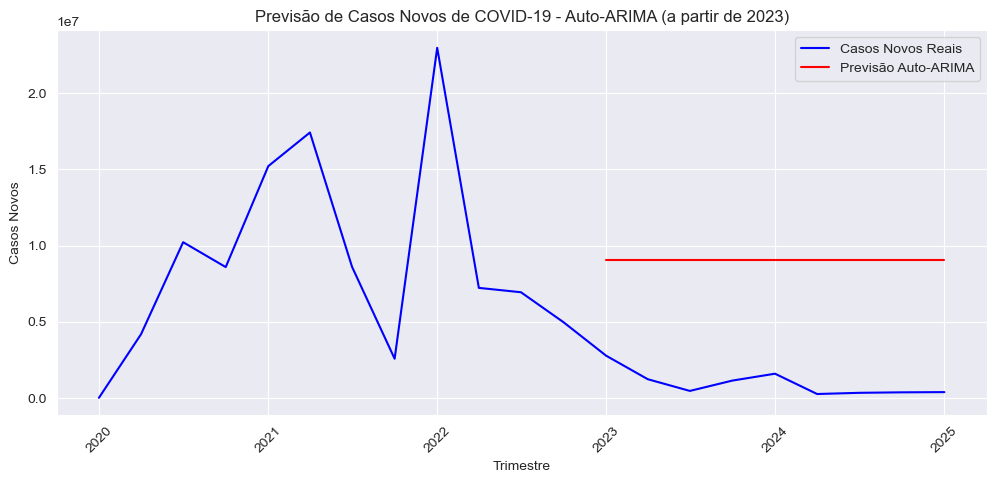

In [ ]:
# Converter trimestre para datetime
df_trimestral["trimestre_dt"] = pd.PeriodIndex(df_trimestral["trimestre"], freq="Q").to_timestamp()

# Separar treino e teste (a partir de 2023)
train = df_trimestral[df_trimestral["trimestre_dt"] < "2023-01-01"]["casosNovos"]
test = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["casosNovos"]
test_index = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["trimestre"]

# Auto-ARIMA
auto_model = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
print(auto_model.summary())

# Previsões
forecast_auto_arima = auto_model.predict(n_periods=len(test))

# Avaliação
mae = mean_absolute_error(test, forecast_auto_arima)
mse = mean_squared_error(test, forecast_auto_arima)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_auto_arima) / test)) * 100

print("\nAvaliação do modelo Auto-ARIMA:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plotagem
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos Reais", color="blue")
plt.plot(test_index, forecast_auto_arima, label="Previsão Auto-ARIMA", color="red")
plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 - Auto-ARIMA (a partir de 2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### Modelo de previsão AUTO-SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=413.779, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=417.878, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=418.509, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=425.287, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=415.779, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=415.774, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=417.769, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=415.907, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=416.529, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[4] intercept
Total fit time: 0.271 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:         

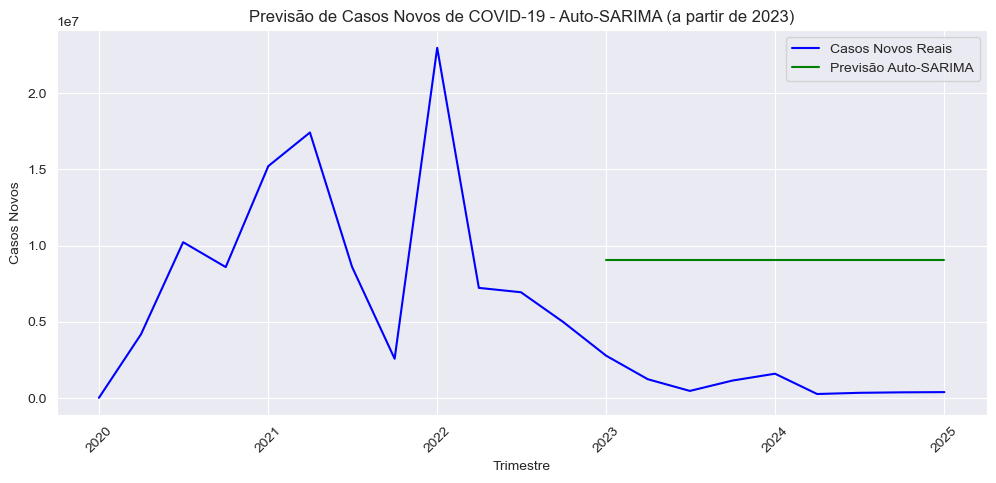

In [ ]:
# Auto-SARIMA com m=4 (sazonalidade trimestral)
train = df_trimestral[df_trimestral["trimestre_dt"] < "2023-01-01"]["casosNovos"]
test = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["casosNovos"]
test_index = df_trimestral[df_trimestral["trimestre_dt"] >= "2023-01-01"]["trimestre"]

auto_sarima_model = auto_arima(train, seasonal=True, m=4, D=0, trace=True, stepwise=True, suppress_warnings=True)
print(auto_sarima_model.summary())

forecast_sarima = auto_sarima_model.predict(n_periods=len(test))

# Avaliação
mae_sarima = mean_absolute_error(test, forecast_sarima)
mse_sarima = mean_squared_error(test, forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = np.mean(np.abs((test - forecast_sarima) / test)) * 100

print("\nAvaliação do modelo Auto-SARIMA:")
print(f"MAE: {mae_sarima:.2f}")
print(f"MSE: {mse_sarima:.2f}")
print(f"RMSE: {rmse_sarima:.2f}")
print(f"MAPE: {mape_sarima:.2f}%")

# Plotagem
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos Reais", color="blue")
plt.plot(test_index, forecast_sarima, label="Previsão Auto-SARIMA", color="green")
plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 - Auto-SARIMA (a partir de 2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Modelo de previsão Modelo XGBoost

Melhores Hiperparâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Avaliação do modelo XGBoost:
MAE: 10724589.11
MSE: 155813375851690.66
RMSE: 12482522.82
MAPE: 1774.54%


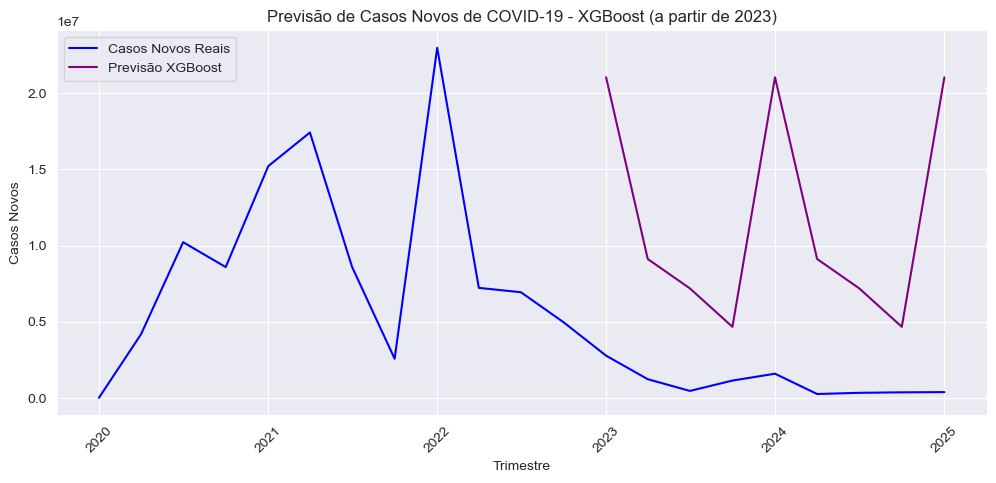

In [ ]:
# Features temporais
df_trimestral["trimestre"] = pd.to_datetime(df_trimestral["trimestre"])
df_trimestral["ano"] = df_trimestral["trimestre"].dt.year
df_trimestral["mes"] = df_trimestral["trimestre"].dt.month
df_trimestral["trimestre_num"] = df_trimestral["trimestre"].dt.quarter

features = ["ano", "mes", "trimestre_num"]
X = df_trimestral[features]
y = df_trimestral["casosNovos"]

# Separar treino/teste com base no tempo (a partir de 2023)
train_mask = df_trimestral["trimestre"] < "2023-01-01"
test_mask = ~train_mask
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]
test_index = df_trimestral[test_mask]["trimestre"]

# Modelo
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", enable_categorical=True, random_state=42)

# Grid Search
param_grid = {
    "n_estimators": [100],
    "learning_rate": [0.1],
    "max_depth": [3],
    "subsample": [1.0],
    "colsample_bytree": [1.0]
}
tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(xgb_model, param_grid, scoring="neg_mean_absolute_error", cv=tscv, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Previsões
y_pred_xgb = best_xgb.predict(X_test)

# Avaliação
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

print("\nAvaliação do modelo XGBoost:")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

# Plotagem
plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Novos Reais", color="blue")
plt.plot(test_index, y_pred_xgb, label="Previsão XGBoost", color="purple")
plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 - XGBoost (a partir de 2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Modelo de previsão Modelo LSTM (Long Short-Term Memory)

Epoch 1/100


C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2715 - val_loss: 0.0016
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.2673 - val_loss: 0.0014
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2631 - val_loss: 0.0012
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2589 - val_loss: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2546 - val_loss: 8.7509e-04
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2504 - val_loss: 7.5617e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2461 - val_loss: 6.6531e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2418 - val_loss: 6.0322e-04
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2374 - val_loss: 5.7169e-04
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2331 - val_loss: 5.7292e-04
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2287 - val_loss: 6.0900e-04
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0

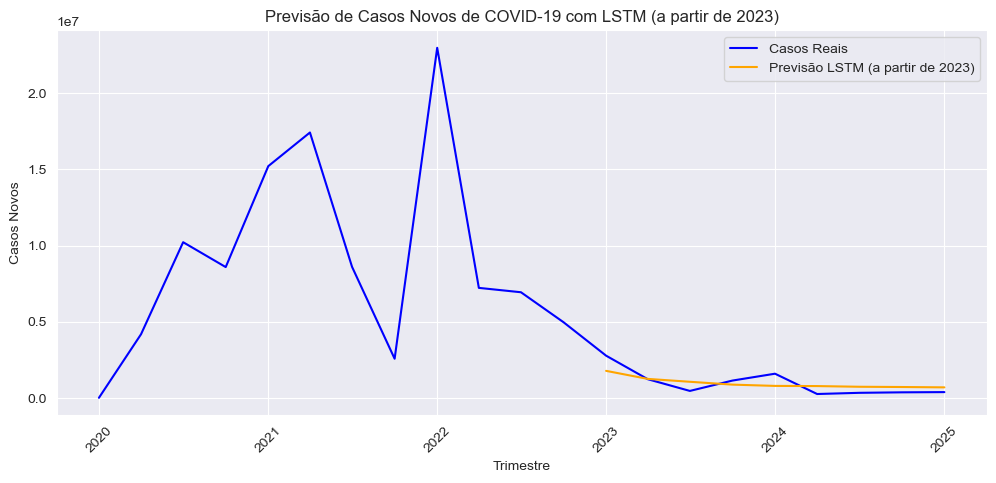

In [ ]:
# --- Pré-processamento ---

# Converter trimestre para datetime
df_trimestral["trimestre_dt"] = pd.PeriodIndex(df_trimestral["trimestre"], freq="Q").to_timestamp()

# Ordenar por data
df_trimestral = df_trimestral.sort_values("trimestre_dt")

# Normalizar os dados
scaler = MinMaxScaler()
casos_scaled = scaler.fit_transform(df_trimestral["casosNovos"].values.reshape(-1, 1))

# Criar sequências para LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Definir tamanho da janela (ex: 4 trimestres = 1 ano)
SEQ_LENGTH = 4
X, y = create_sequences(casos_scaled, SEQ_LENGTH)

# Separar treino e teste com base na data
train_size = len(df_trimestral[df_trimestral["trimestre_dt"] < "2023-01-01"]) - SEQ_LENGTH
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Modelo LSTM ---

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinamento com early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

# --- Previsão ---

y_pred = model.predict(X_test)

# Inverter a normalização
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Avaliar previsões
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# --- Plotar resultados ---

# Gerar rótulos dos trimestres para o eixo X no formato AAAAQN
trimestres = df_trimestral["trimestre"].iloc[SEQ_LENGTH + train_size:]

plt.figure(figsize=(12, 5))
plt.plot(df_trimestral["trimestre"], df_trimestral["casosNovos"], label="Casos Reais", color="blue")
plt.plot(trimestres, y_pred_inv, label="Previsão LSTM (a partir de 2023)", color="orange")
plt.xlabel("Trimestre")
plt.ylabel("Casos Novos")
plt.title("Previsão de Casos Novos de COVID-19 com LSTM (a partir de 2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Resultados**

**ARIMA**
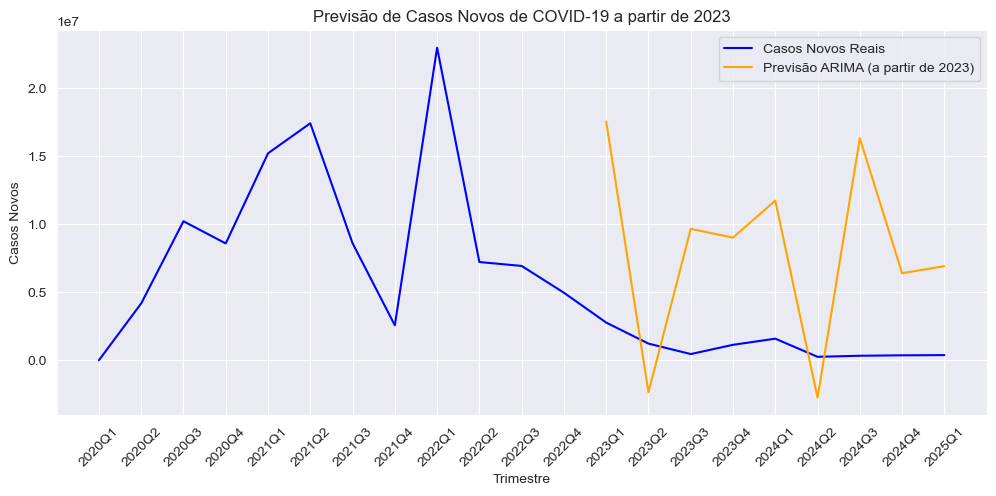
**Avaliação:**

*1ª rodada:*
* MAE: 336337.50
* MSE: 345009246165.37
* RMSE: 587374.88
* MAPE: 38.22%

*2ª rodada:*
* MAE: 8568625.03
* MSE: 91566632632763.84
* RMSE: 9569045.54
* MAPE: 1458.49%

No primeiro momento, o ARIMA demonstrou bom desempenho, com MAE de 336,337.50 e MAPE de 38.22%, capturando bem os padrões gerais, especialmente em períodos de estabilização. No entanto, com a adição de mais dados, o desempenho do modelo caiu significativamente, apresentando MAE de 8,568,625.03 e MAPE de 1458.49%. Isso indica que o ARIMA tem dificuldades em lidar com séries temporais de longa duração e alta variabilidade, sendo mais eficaz em séries mais curtas ou menos dinâmicas.

**Prophet**
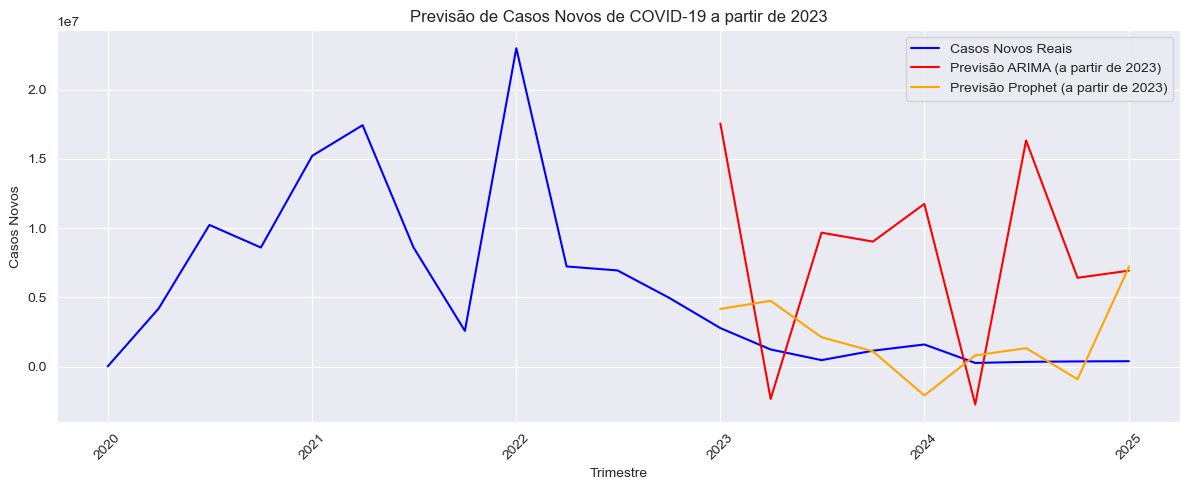
**Avaliação:**

*Primeira rodada:*
* MAE: 3076369.52
* MSE: 20305748632690.33
* RMSE: 4506190.04
* MAPE: 2143.96%

*Segunda rodada:*
* MAE: 2211230.40
* MSE: 8872718319286.55
* RMSE: 2978710.85
* MAPE: 387.86%

O Prophet apresentou um desempenho inicial insatisfatório, com MAE de 3,076,369.52 e MAPE de 2143.96%, devido à sua incapacidade de capturar padrões complexos e alta volatilidade. Com os dados adicionais, o modelo mostrou uma melhora significativa, reduzindo o MAPE para 387.86% e o MAE para 2,211,230.40. Apesar disso, ele ainda apresenta limitações em períodos de alta variabilidade, mas sua evolução demonstra potencial para ajustes futuros.

**Auto-ARIMA**
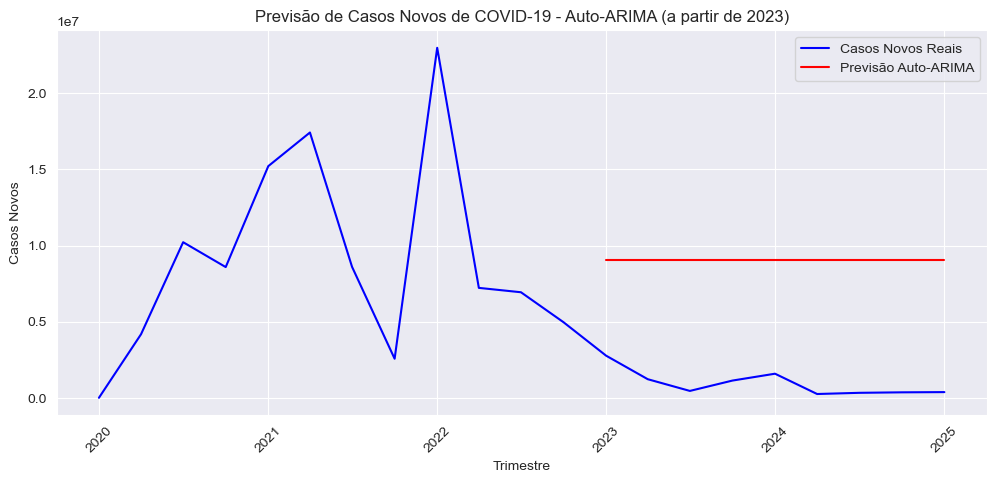
**Avaliação:**

*Primeira rodada:*
* MAE: 509107.73
* MSE: 278855673332.55
* RMSE: 528067.87
* MAPE: 134.75%

*Segunda rodada:*
* MAE: 8125230.25
* MSE: 66642043952351.12
* RMSE: 8163457.84
* MAPE: 1579.77%

Na primeira avaliação, o Auto-ARIMA apresentou desempenho mediano, com MAE de 509,107.73 e MAPE de 134.75%, ficando atrás do ARIMA tradicional. Na segunda análise, o modelo mostrou um declínio em sua eficácia, com MAE de 8,125,230.25 e MAPE de 1579.77%, indicando que o ajuste automático dos parâmetros não foi suficiente para lidar com a complexidade adicional dos dados. Assim, o Auto-ARIMA mostrou-se inadequado para séries temporais mais complexas.

**AUTO-SARIMA**
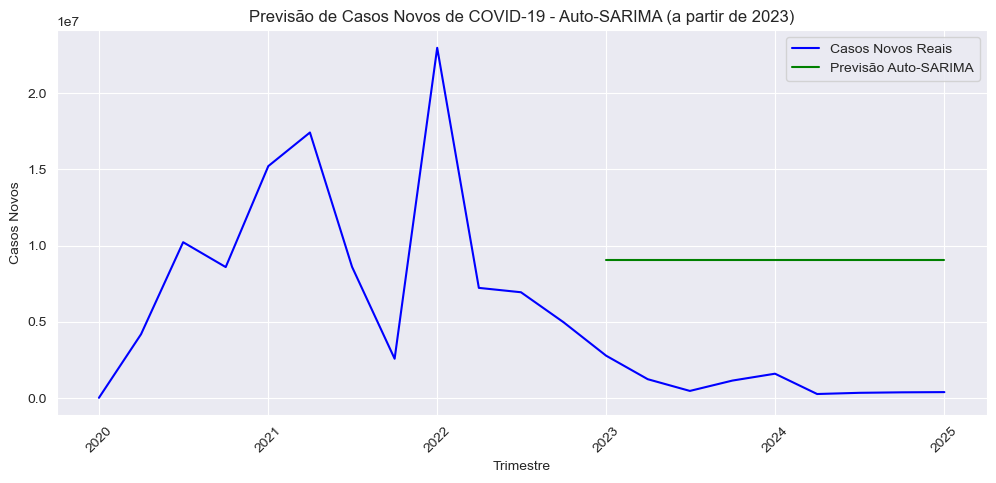
**Avaliação:**

*Primeira rodada:*
* MAE: 6568624.80
* MSE: 43400315262337.23
* RMSE: 6587891.56
* MAPE: 1687.85%

*Segunda rodada:*
* MAE: 8125230.25
* MSE: 66642043952351.12
* RMSE: 8163457.84
* MAPE: 1579.77%

O SARIMA apresentou um desempenho ruim na primeira rodada, com MAE de 6,568,624.80 e MAPE de 1687.85%. Na segunda rodada, apresentou resultados idênticos ao Auto-ARIMA na segunda análise, com MAE de 8,125,230.25 e MAPE de 1579.77%. Isso sugere que a inclusão de sazonalidade não trouxe benefícios significativos, possivelmente porque os padrões sazonais não são predominantes ou o modelo não conseguiu capturá-los adequadamente.

**XGBoost**
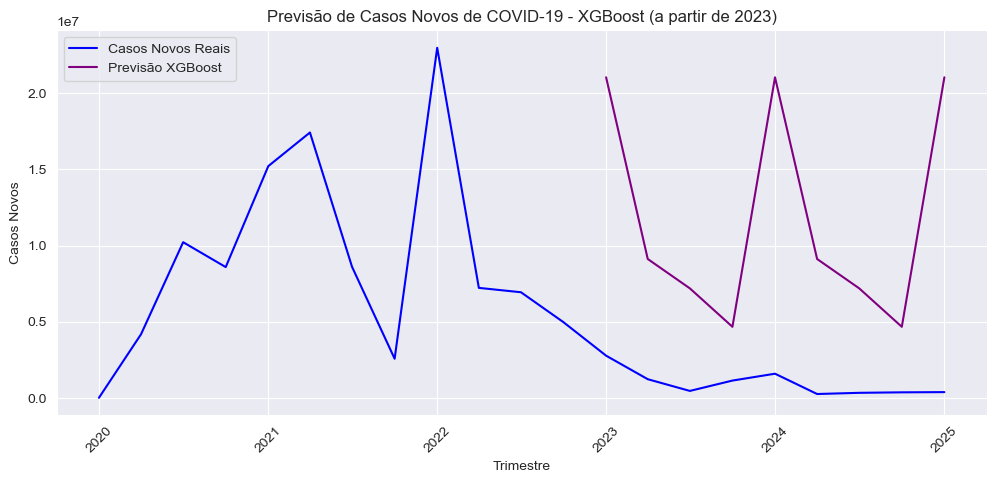
**Avaliação:**

*Primeira rodada:*
* MAE: 4870497.40
* MSE: 23906839994915.60
* RMSE: 4889462.14
* MAPE: 1254.83%

*Segunda rodada:*
Avaliação do modelo XGBoost:
* MAE: 10724589.11
* MSE: 155813375851690.66
* RMSE: 12482522.82
* MAPE: 1774.54%

O XGBoost apresentou o pior desempenho em ambas as avaliações, com MAE de 10,724,589.11 e MAPE de 1774.54% na segunda análise. O modelo demonstrou limitações claras em capturar padrões temporais e apresentou um viés significativo, especialmente em períodos de alta estabilidade. Isso reforça sua inadequação para este tipo de problema sem ajustes específicos para séries temporais.

**LSTM**
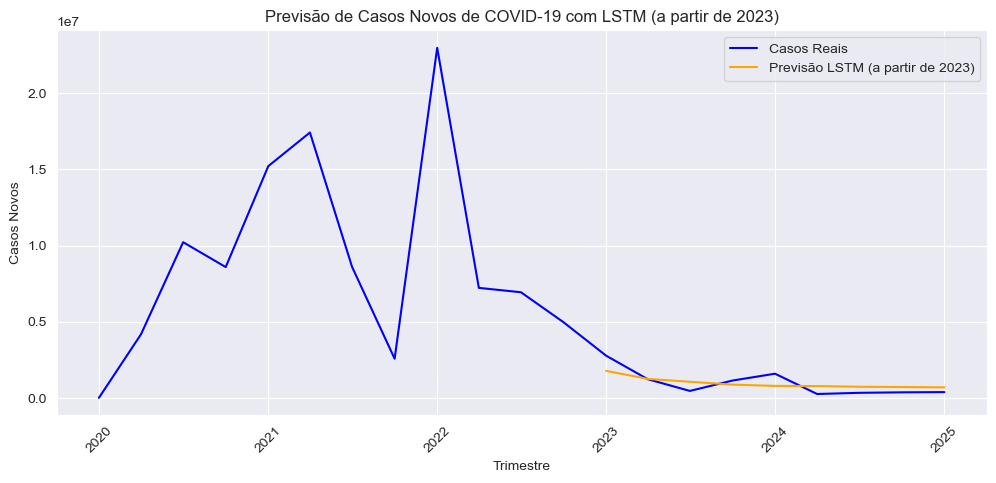
**Avaliação:**

*Segunda rodada:*
* MAE: 473636.74
* MSE: 301475870468.06
* RMSE: 549068.18
* MAPE: 80.12%

O modelo LSTM destacou-se como o mais robusto e eficaz. Durante a segunda análise adicionamos esse modelo ao estudo, ele apresentou o menor erro percentual (MAPE de 80.12%) e o menor erro absoluto médio (MAE de 473,636.74), demonstrando sua capacidade de lidar com a não linearidade e a alta variabilidade da série temporal. Apesar disso, ainda há espaço para melhorias, especialmente em períodos de alta volatilidade.


# **Dicussão e Conclusão**

Os resultados indicam que o LSTM é o modelo mais robusto e eficaz para prever novos casos ou óbitos de COVID-19, demonstrando capacidade de lidar com a maior complexidade e variabilidade da série temporal com a adição de mais dados. O ARIMA, que inicialmente teve bom desempenho, mostrou limitações significativas em cenários mais complexos, enquanto o Prophet apresentou uma evolução promissora, mas ainda insuficiente. Modelos automáticos como Auto-ARIMA e Auto-SARIMA não foram eficazes, e o XGBoost reafirmou sua inadequação para este problema.

Entre os modelos tradicionais, o ARIMA foi o mais consistente na primeira avaliação, capturando padrões gerais em períodos de estabilização, mas sua eficácia foi comprometida com a inclusão de mais dados. Já o Prophet, apesar de não ser o mais preciso, demonstrou flexibilidade e potencial para ajustes futuros. O XGBoost, por outro lado, apresentou viés significativo e previsões inconsistentes em ambas as rodadas, reforçando sua inadequação para séries temporais complexas.

Para aprimorar as previsões, recomenda-se o ajuste fino dos hiperparâmetros do LSTM, a inclusão de variáveis exógenas (como taxas de vacinação e mobilidade populacional) e a exploração de técnicas híbridas que combinem modelos lineares e não lineares. Além disso, o uso de validação temporal e backtesting contínuo pode ajudar a garantir que os modelos sejam robustos em diferentes cenários. Essas estratégias têm o potencial de melhorar ainda mais a precisão e a confiabilidade das previsões futuras.

Por fim, a atualização contínua do modelo com novos dados e a recalibração periódica são fundamentais para acompanhar mudanças na série temporal e melhorar a precisão das previsões.

# **Apresentação**

Colocar os links dos vídeos.

# **Referências**

1 - ESTADÃO CONTEÚDO. Brasil registra 57 mil casos de covid-19 em janeiro, maior número dos últimos 10 meses. Disponível em: https://noticias.uol.com.br/ultimas-noticias/agencia-estado/2025/01/29/brasil-tem-maior-n-de-casos-de-covid-dos-ultimos-10-meses-diagnostico-subiu-151-em-janeiro.htm. Acesso em: 28 fev. 2025.

2‌‌ ‌-‌ ‌SECRETARIA DE VIGILÂNCIA EM SAÚDE E AMBIENTE. Informe - Vigilância das Síndromes Gripais. Disponível em: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/c/covid-19/atualizacao-de-casos/informe-se-7-de-2025.pdf. Acesso em: 28 fev. 2025.

3 - AGÊNCIA BRASIL. Estudo genético na Maré mostra evolução da covid-19 com impacto global. Disponível em: https://agenciabrasil.ebc.com.br/saude/noticia/2025-02/estudo-genetico-na-mare-mostra-evolucao-da-covid-19-com-impacto-global. Acesso em: 28 fev. 2025.

4 - MINISTÉRIO DA SAÚDE. Coronavírus Brasil. Disponível em: https://covid.saude.gov.br/. Acesso em: 28 fev. 2025.

5 - Pandas. Pandas Documentation. Disponível em: https://pandas.pydata.org/. Acesso em: 28 fev. 2025.

6 - NumPy. NumPy Documentation. Disponível em: https://numpy.org/. Acesso em: 28 fev. 2025.

7 - Matplotlib. Matplotlib Documentation. Disponível em: https://matplotlib.org/stable/contents.html. Acesso em: 28 fev. 2025.

8 - Seaborn. Seaborn Documentation. Disponível em: https://seaborn.pydata.org/. Acesso em: 28 fev. 2025.

9 - PrettyTable. PrettyTable Documentation. Disponível em: https://pypi.org/project/prettytable/. Acesso em: 28 fev. 2025.

10 - ARIMA. ARIMA Documentation. Disponível em: https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html. Acesso em: 23 mar. 2025.

11 - Scikit-learn. Scikit-learn Documentation. Disponível em: https://scikit-learn.org/stable/. Acesso em: 23 mar. 2025.

12 - Prophet. Prophet Documentation. Disponível em: https://facebook.github.io/prophet/. Acesso em: 23 mar. 2025.

13 - S. Prakash, A. S. Jalal and P. Pathak, "Forecasting COVID-19 Pandemic using Prophet, LSTM, hybrid GRU-LSTM, CNN-LSTM, Bi-LSTM and Stacked-LSTM for India," 2023 6th International Conference on Information Systems and Computer Networks (ISCON), Mathura, India, 2023, pp. 1-6, doi: 10.1109/ISCON57294.2023.10112065.

14 - A. S, R. F. Johnson, R. k. N, M. T R and V. V, "Predicting the number of new cases of COVID-19 in India using Survival Analysis and LSTM," 2021 Fifth International Conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud) (I-SMAC), Palladam, India, 2021, pp. 1-4, doi: 10.1109/I-SMAC52330.2021.9640899.

15 - P. R. S. dos Santos et al., "Prediction of COVID-19 using Time-Sliding Window: The case of Piauí State - Brazil," 2020 IEEE International Conference on E-health Networking, Application & Services (HEALTHCOM), Shenzhen, China, 2021, pp. 1-6, doi: 10.1109/HEALTHCOM49281.2021.9399048.

16 - S. Singh, S. Mittal and S. Singh, "Analysis and Forecasting of COVID-19 Pandemic Using ARIMA Model," 2023 3rd International Conference on Advances in Computing, Communication, Embedded and Secure Systems (ACCESS), Kalady, Ernakulam, India, 2023, pp. 143-148, doi: 10.1109/ACCESS57397.2023.10199278.


In [ ]:
#@title **Avaliação**
Problema = 10 #@param {type:"slider", min:0, max:10, step:1}

Metodologia = 10 #@param {type:"slider", min:0, max:10, step:1}

Resultados = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao_geral = 10 #@param {type:"slider", min:0, max:10, step:1}

Artigo = 10 #@param {type:"slider", min:0, max:10, step:1}









In [ ]:
#@title **Nota Final**
nota = 0.1*Problema + 0.3*Metodologia + 0.2*Resultados + 0.2*Conclusao + 0.2*Artigo

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,5):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Carolina Molinari Monteforte,10.0
1,Leandro da Cruz Cirqueira,10.0
2,Levy Salles Bispo de Oliveira,10.0
3,William Silva Veçoso,10.0
